# Visualization and SLRegression - Nabil Stock Data

In [ ]:
import pandas as pd #alias
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from pandas_visual_analysis import VisualAnalysis, DataSource
import os
import seaborn as sns # Statistical data visualization
import scipy as spy
#import dtale

In [ ]:
file="Nabil.csv"
os.path.exists(file)

In [ ]:
nabil=pd.read_csv(file)
#nabil = nabil.sort_values(by=['BUSINESSDATE'])
nabil.head()

## STATS

In [ ]:
nabil.columns

In [ ]:
[nabil.skew(), nabil.kurtosis(), nabil['HIGHPRICE'].mean(), nabil['HIGHPRICE'].std(), nabil['HIGHPRICE'].mode()]

In [ ]:
#nabil.corr()
round(nabil.corr(),2)

In [ ]:
highmean=nabil['HIGHPRICE'].mean()
highmean

In [ ]:
highstd=nabil['HIGHPRICE'].std()
highstd

### Z-value : express how many standard deviations from the mean a value is.

In [ ]:
spy.stats.norm.cdf((1500-highmean)/highstd)

In [32]:
spy.stats.norm.ppf(0.9999)

3.719016485455709

In [33]:
spy.stats.norm.ppf(1-0.025)

1.959963984540054

In [34]:
spy.stats.t.cdf(2.1, 29)

0.9777290209818548

## Info

In [35]:
nabil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        62 non-null     datetime64[ns]
 1   close       62 non-null     int64         
 2   high        62 non-null     int64         
 3   low         62 non-null     int64         
 4   tradedQty   62 non-null     int64         
 5   tradedVal   62 non-null     int64         
 6   totalTrade  62 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.5 KB


In [36]:
nabilApr=nabil[nabil.BUSINESSDATE.str.contains('4/.*/2021')]
nabilApr

AttributeError: 'DataFrame' object has no attribute 'BUSINESSDATE'

In [ ]:
nabil.BUSINESSDATE=pd.to_datetime(nabil.BUSINESSDATE) #.strftime('%d-%m-%y')

In [ ]:
nabil.describe()

In [37]:
nabil.rename(columns={
    "TOTALTRADES": "totalTrade", "TOTALTRADEDVALUE": "tradedVal","TOTALTRADEDQUANTITY":"tradedQty",
    "HIGHPRICE":"high","LOWPRICE":'low',"CLOSEPRICE":'close','BUSINESSDATE':"date"}, inplace=True)

In [38]:
nabil

,date,close,high,low,tradedQty,tradedVal,totalTrade
0,2021-07-01,1297,1305,1293,41519,53900000,616
1,2021-06-30,1296,1315,1232,69882,90200000,638
2,2021-06-29,1296,1310,1295,62112,80700000,672
3,2021-06-28,1302,1334,1297,66695,87100000,738
4,2021-06-27,1298,1306,1250,81126,105000000,966
...,...,...,...,...,...,...,...
57,2021-04-08,1330,1339,1316,136914,182000000,977
58,2021-04-07,1317,1334,1310,104059,138000000,720
59,2021-04-06,1311,1324,1300,103143,135000000,830
60,2021-04-05,1315,1332,1303,117881,156000000,893


In [39]:
nabil.date.describe(datetime_is_numeric=True)

count                               62
mean     2021-05-19 00:23:13.548387072
min                2021-04-04 00:00:00
25%                2021-04-27 06:00:00
50%                2021-05-18 12:00:00
75%                2021-06-09 18:00:00
max                2021-07-01 00:00:00
Name: date, dtype: object

In [40]:
nabil["date"].min(), nabil["date"].max()

(Timestamp('2021-04-04 00:00:00'), Timestamp('2021-07-01 00:00:00'))

In [41]:
nabil["date"].min()-nabil["date"].max()

Timedelta('-88 days +00:00:00')

In [42]:
monthlyAvg = nabil.resample("M", on="date").mean()
monthlyAvg

,close,high,low,tradedQty,tradedVal,totalTrade
date,,,,,,
2021-04-30,1308.944444,1339.388889,1289.444444,137314.777778,1.804500e+08,1134.666667
2021-05-31,1285.714286,1308.666667,1275.476190,95271.714286,1.227714e+08,963.238095
2021-06-30,1302.727273,1331.727273,1286.500000,114204.363636,1.490000e+08,1165.727273
2021-07-31,1297.000000,1305.000000,1293.000000,41519.000000,5.390000e+07,616.000000


In [43]:
weeklyAvg = nabil.resample("W", on="date").mean()
weeklyAvg

,close,high,low,tradedQty,tradedVal,totalTrade
date,,,,,,
2021-04-04,1316.00,1347.00,1293.00,188377.00,246000000.0,1284.00
2021-04-11,1318.25,1332.25,1307.25,115499.25,152750000.0,855.00
2021-04-18,1358.25,1390.00,1320.25,183704.00,249000000.0,1387.75
2021-04-25,1299.20,1347.40,1288.00,132455.00,172200000.0,1182.00
2021-05-02,1263.60,1286.20,1246.40,103553.60,130820000.0,1047.00
2021-05-09,1269.60,1288.00,1264.20,83955.80,106800000.0,755.20
2021-05-16,1268.40,1278.40,1259.00,99847.00,126880000.0,895.40
2021-05-23,1306.00,1343.80,1290.00,90647.60,118560000.0,1095.00
2021-05-30,1305.00,1331.00,1293.00,102949.25,134500000.0,1100.75


In [44]:
fiftyAvg = nabil.resample("50D", on="date").mean()
fiftyAvg

,close,high,low,tradedQty,tradedVal,totalTrade
date,,,,,,
2021-04-04,1295.764706,1322.205882,1280.617647,115808.382353,1.508618e+08,1033.176471
2021-05-24,1302.214286,1329.964286,1287.500000,110317.928571,1.438893e+08,1135.214286


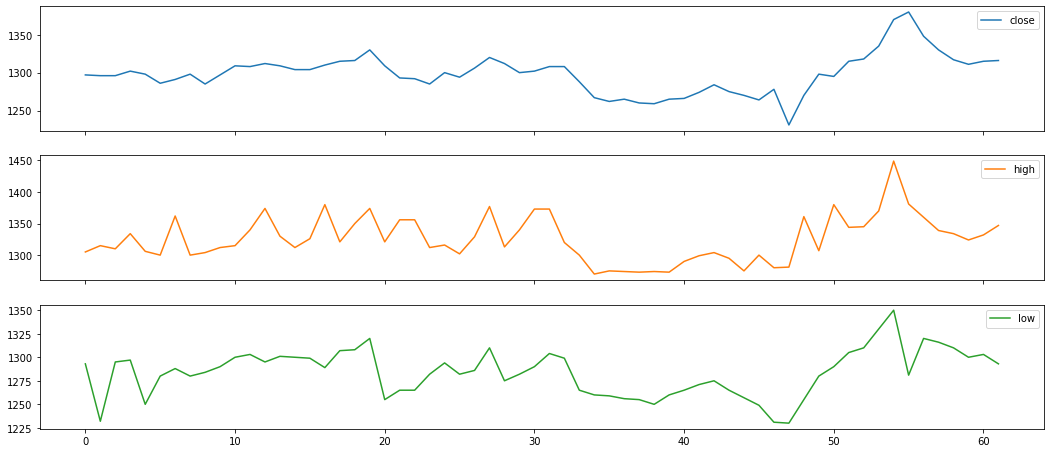

In [45]:
nabil[nabil.columns[1:4]].plot(kind='line',subplots=True,figsize=(18, 16),layout=(6,1))     #plt.savefig('testnabil.png')
plt.show()

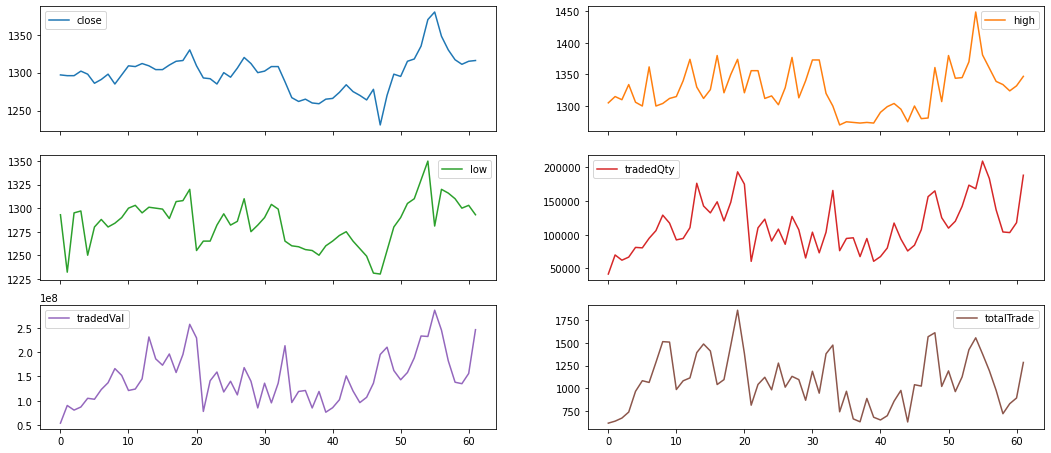

In [46]:
nabil[nabil.columns[1:]].plot(subplots=True,figsize=(18, 16),layout=(6,2))     #plt.savefig('testnabil.png')
plt.show()

In [47]:
[
    #nabil.iloc[0::5]['date'].dt.day,
 nabil.iloc[0::5]['date'].dt.day_name(),
 nabil.iloc[0::5]['date'].dt.month_name(),
 #nabil.iloc[0::5]['date'].dt.year
]

[0      Thursday
 5      Thursday
 10     Thursday
 15     Thursday
 20     Thursday
 25     Thursday
 30    Wednesday
 35    Wednesday
 40    Wednesday
 45    Wednesday
 50    Wednesday
 55      Tuesday
 60       Monday
 Name: date, dtype: object,
 0      July
 5      June
 10     June
 15     June
 20     June
 25      May
 30      May
 35      May
 40      May
 45    April
 50    April
 55    April
 60    April
 Name: date, dtype: object]

In [48]:
nabilApr=nabil[nabil.date.between('2021/04/01','2021/04/30')]
##
#nabilApr=nabil[nabil.date.str.contains('/04/')]
#nabilApr=nabil[nabil['date'].between('2021-04-01','2021-04-30')]
#nabilApr=nabil[nabil['date'].dt.contains('-04-')]
nabilApr.head()

,date,close,high,low,tradedQty,tradedVal,totalTrade
44,2021-04-29,1270,1275,1257,75819,96100000,629
45,2021-04-28,1264,1300,1249,84413,107000000,1039
46,2021-04-27,1278,1280,1231,107440,136000000,1024
47,2021-04-26,1231,1281,1230,156529,195000000,1567
48,2021-04-25,1270,1361,1255,165129,210000000,1611


In [49]:
df=nabil.copy()
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['weekday'] = pd.DatetimeIndex(df['date']).day_name()
df['monthName'] = pd.DatetimeIndex(df['date']).month_name()
df['diff'] = df['high']-df['low']
df

,date,close,high,low,tradedQty,tradedVal,totalTrade,year,month,weekday,monthName,diff
0,2021-07-01,1297,1305,1293,41519,53900000,616,2021,7,Thursday,July,12
1,2021-06-30,1296,1315,1232,69882,90200000,638,2021,6,Wednesday,June,83
2,2021-06-29,1296,1310,1295,62112,80700000,672,2021,6,Tuesday,June,15
3,2021-06-28,1302,1334,1297,66695,87100000,738,2021,6,Monday,June,37
4,2021-06-27,1298,1306,1250,81126,105000000,966,2021,6,Sunday,June,56
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-04-08,1330,1339,1316,136914,182000000,977,2021,4,Thursday,April,23
58,2021-04-07,1317,1334,1310,104059,138000000,720,2021,4,Wednesday,April,24
59,2021-04-06,1311,1324,1300,103143,135000000,830,2021,4,Tuesday,April,24
60,2021-04-05,1315,1332,1303,117881,156000000,893,2021,4,Monday,April,29


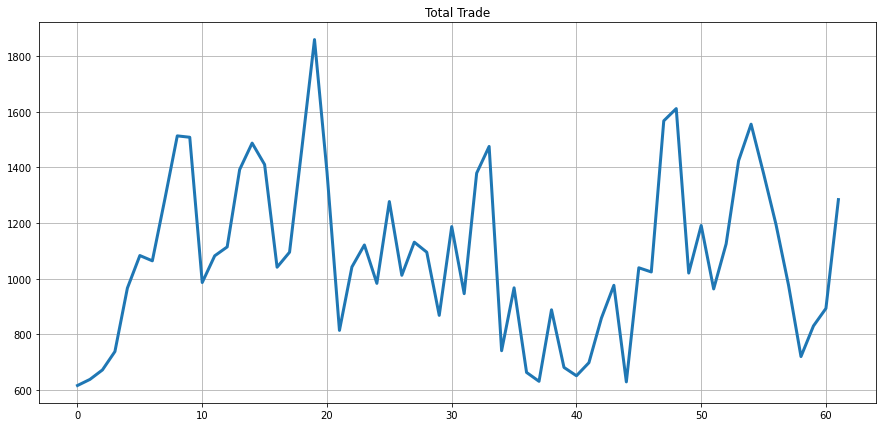

In [55]:
df['totalTrade'].plot(x = 'date' , figsize = (15,7), linewidth = 3, title = 'Total Trade')
plt.grid()
plt.show()

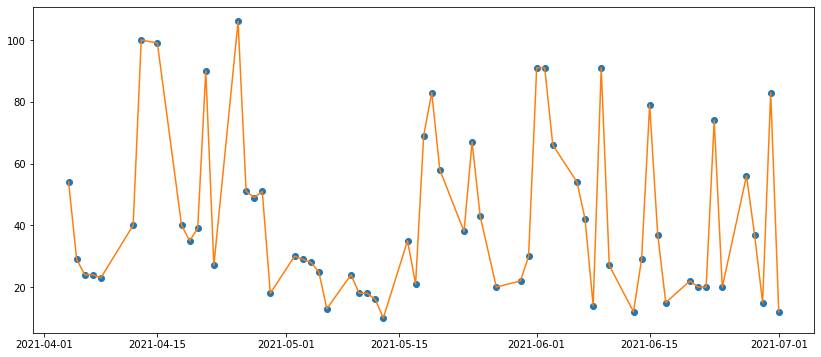

In [56]:
fig = plt.figure(figsize=(14,6))
plt.plot_date(df['date'],df['diff'])
plt.plot(df['date'],df['diff'])
plt.show()

In [57]:
apr15=df[df['date'].between('2021-04-01','2021-04-30')]
#apr15=df[df['date'].between(df['date'].min(),df['date'].max())]
apr15

,date,close,high,low,tradedQty,tradedVal,totalTrade,year,month,weekday,monthName,diff
44,2021-04-29,1270,1275,1257,75819,96100000,629,2021,4,Thursday,April,18
45,2021-04-28,1264,1300,1249,84413,107000000,1039,2021,4,Wednesday,April,51
46,2021-04-27,1278,1280,1231,107440,136000000,1024,2021,4,Tuesday,April,49
47,2021-04-26,1231,1281,1230,156529,195000000,1567,2021,4,Monday,April,51
48,2021-04-25,1270,1361,1255,165129,210000000,1611,2021,4,Sunday,April,106
49,2021-04-22,1298,1307,1280,125239,162000000,1020,2021,4,Thursday,April,27
50,2021-04-21,1295,1380,1290,109757,143000000,1191,2021,4,Wednesday,April,90
51,2021-04-20,1315,1344,1305,120001,158000000,963,2021,4,Tuesday,April,39
52,2021-04-19,1318,1345,1310,142149,188000000,1125,2021,4,Monday,April,35
53,2021-04-18,1335,1370,1330,173619,233000000,1424,2021,4,Sunday,April,40


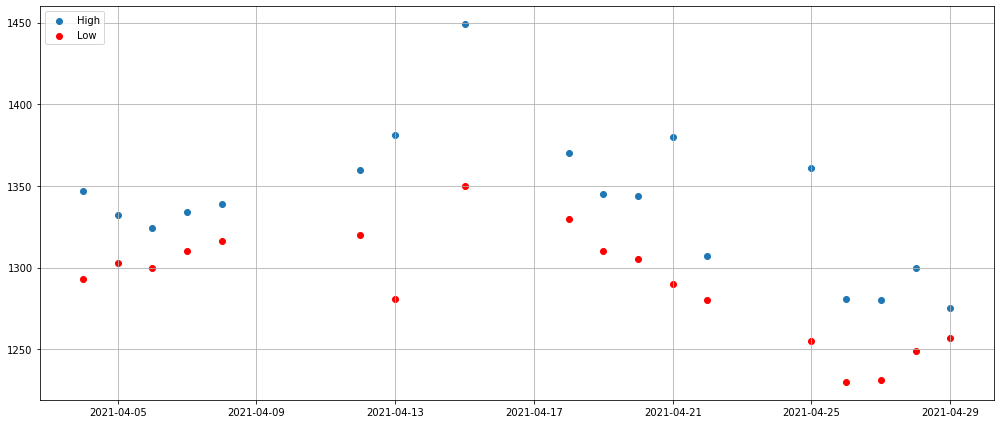

In [58]:
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(apr15['date'],apr15['high'],marker='o',label='High')
ax.scatter(apr15['date'],apr15['low'],marker='o',label='Low',color='r')

#ax.plot(apr15['date'],apr15['high'])
#ax.plot(apr15['date'],apr15['low'])

plt.tight_layout()
plt.grid()
plt.legend(loc="upper left")
plt.show()

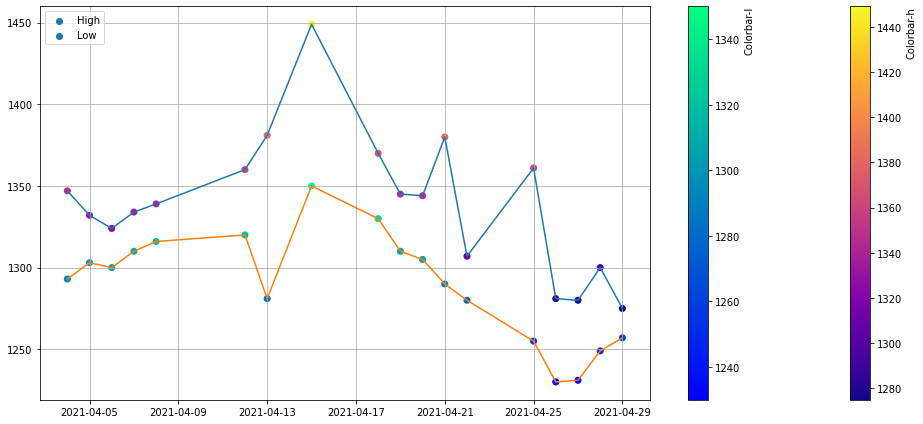

In [59]:
fig, ax = plt.subplots(figsize=(14,6))
sch = ax.scatter(apr15['date'],apr15['high'],marker='o',label='High',c=apr15['high'],cmap='plasma')#dots
ax.plot(apr15['date'],apr15['high'])
scl=ax.scatter(apr15['date'],apr15['low'],marker='o',label='Low',cmap='winter',c=apr15['low']) #color='r'
ax.plot(apr15['date'],apr15['low'])
plt.tight_layout()
cbarh = fig.colorbar(sch)
cbarl = fig.colorbar(scl)
cbarh.set_label("Colorbar-h", loc='top')
cbarl.set_label("Colorbar-l", loc='top')
plt.grid()
plt.legend(loc="upper left")
plt.show()

<AxesSubplot:xlabel='date', ylabel='high'>

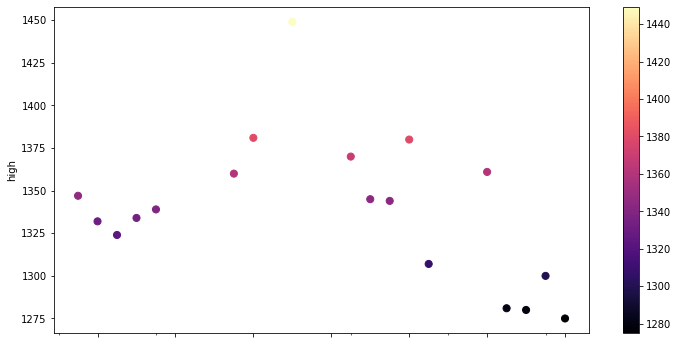

In [60]:
apr15.plot.scatter('date', 'high', c=apr15['high'], cmap="magma", s=50,figsize=(12,6))

In [61]:
df[df.month.eq(4)].date.describe()

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                      18
unique                     18
top       2021-04-28 00:00:00
freq                        1
first     2021-04-04 00:00:00
last      2021-04-29 00:00:00
Name: date, dtype: object

<AxesSubplot:xlabel='date'>

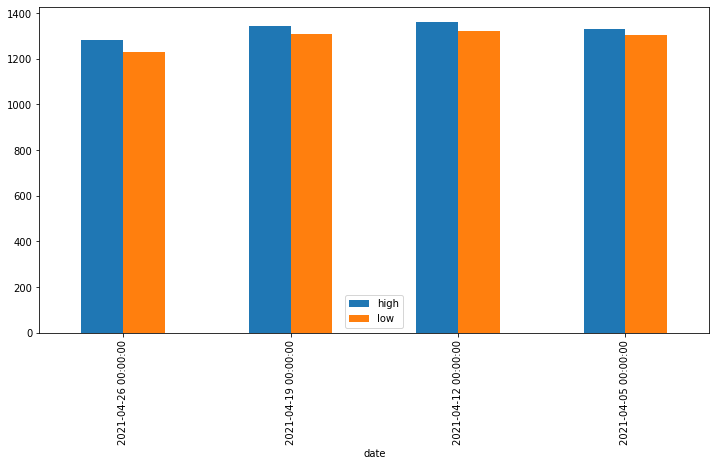

In [62]:
monday=apr15[apr15.weekday.str.contains('Monday')]
thursday=apr15[apr15.weekday.str.contains('Thursday')]
#thursday
monday.plot(kind='bar',x = 'date', y = ['high', 'low'], linewidth = 2, figsize=(12,6))

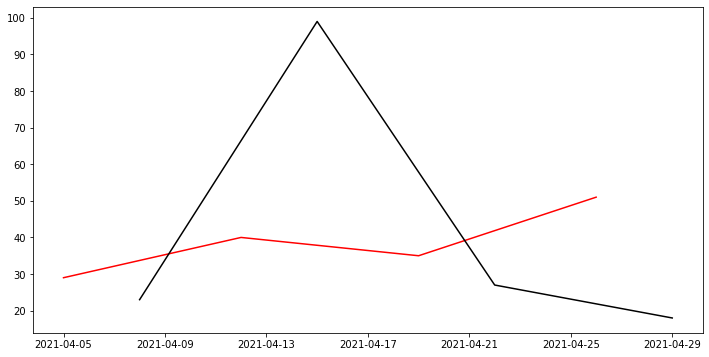

In [63]:
fig = plt.figure(figsize=(12,6))
plt.plot(monday.date,monday['diff'],c='r')
plt.plot(thursday.date,thursday['diff'],c='k')
plt.show()

C:\Users\PETERCHAPAGAIN\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\PETERCHAPAGAIN\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



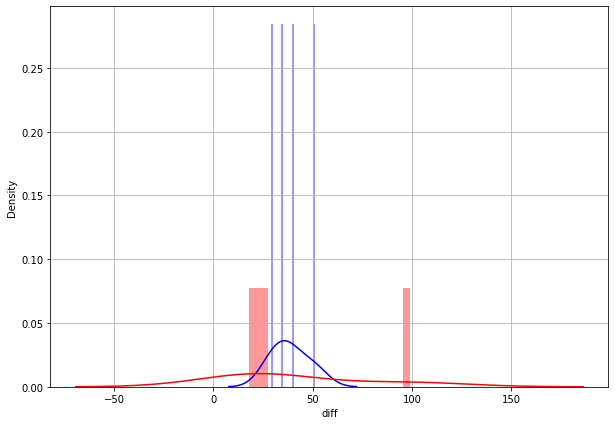

In [64]:
plt.figure(figsize=(10, 7))
sns.distplot(monday['diff'], bins = 25, color = 'blue')
sns.distplot(thursday['diff'], bins = 25, color = 'red')
plt.grid()

In [65]:
#sns.pairplot(nabil, hue = 'tradedQty', vars = ['high', 'close', 'low'] )

<AxesSubplot:>

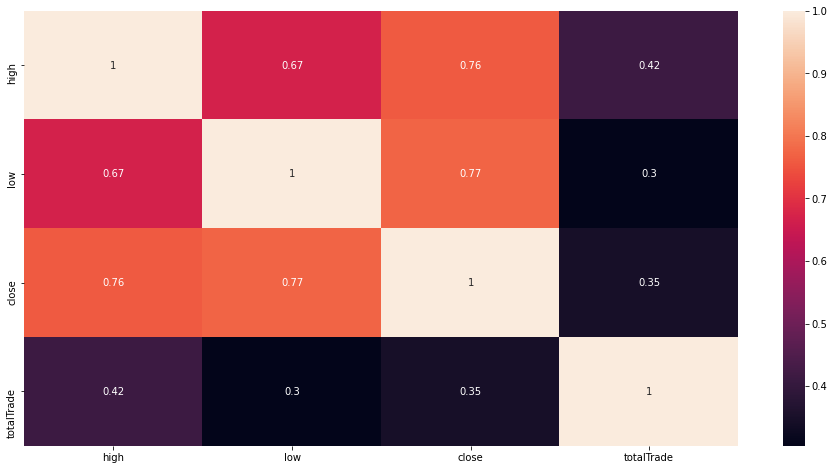

In [66]:
plt.figure(figsize = (16, 8)) 
sns.heatmap(nabil[['high','low','close','totalTrade']].corr(), annot = True) 

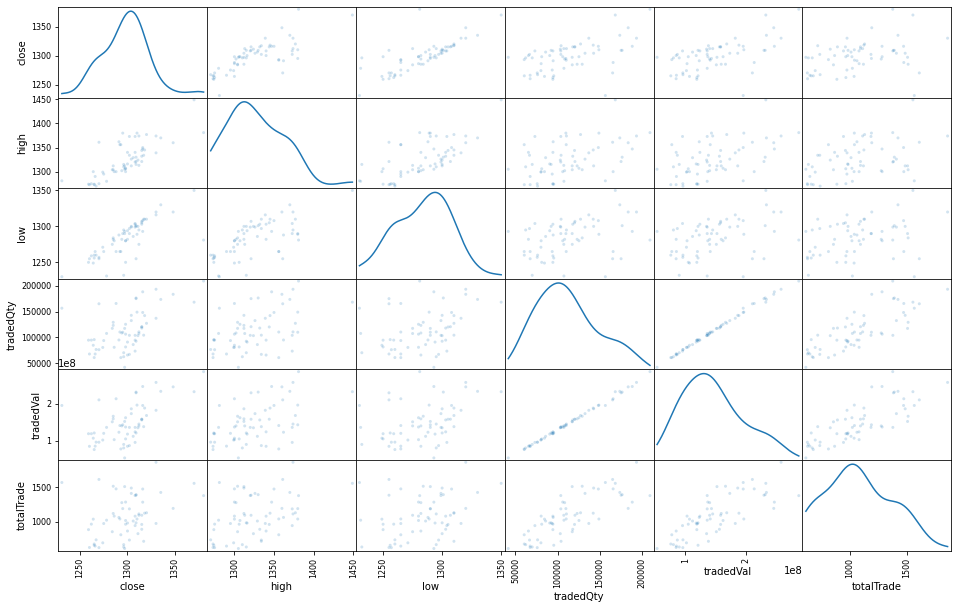

In [67]:
pd.plotting.scatter_matrix(nabil,figsize = (16, 10), diagonal = 'kde',alpha = 0.2)
plt.show()

<AxesSubplot:>

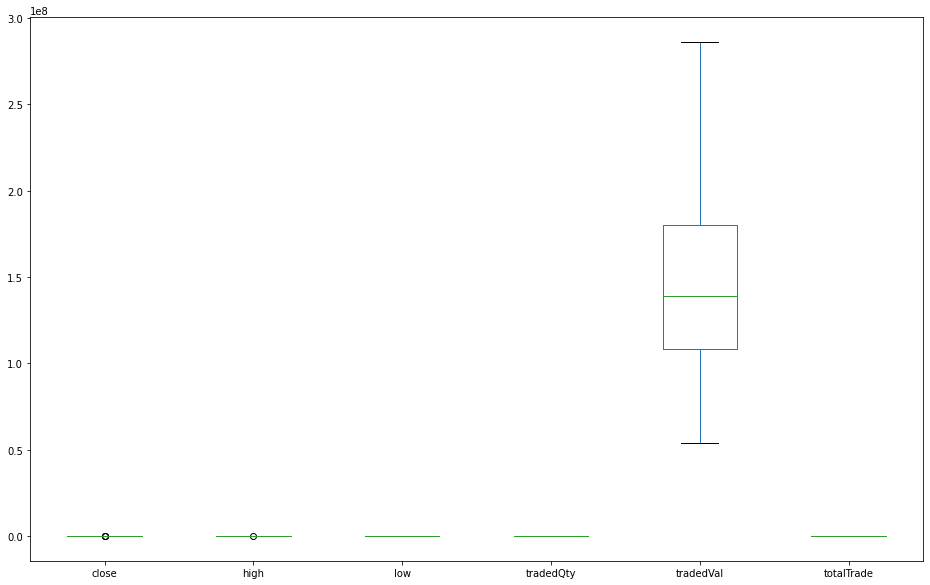

In [68]:
nabil.plot.box(figsize = (16, 10))

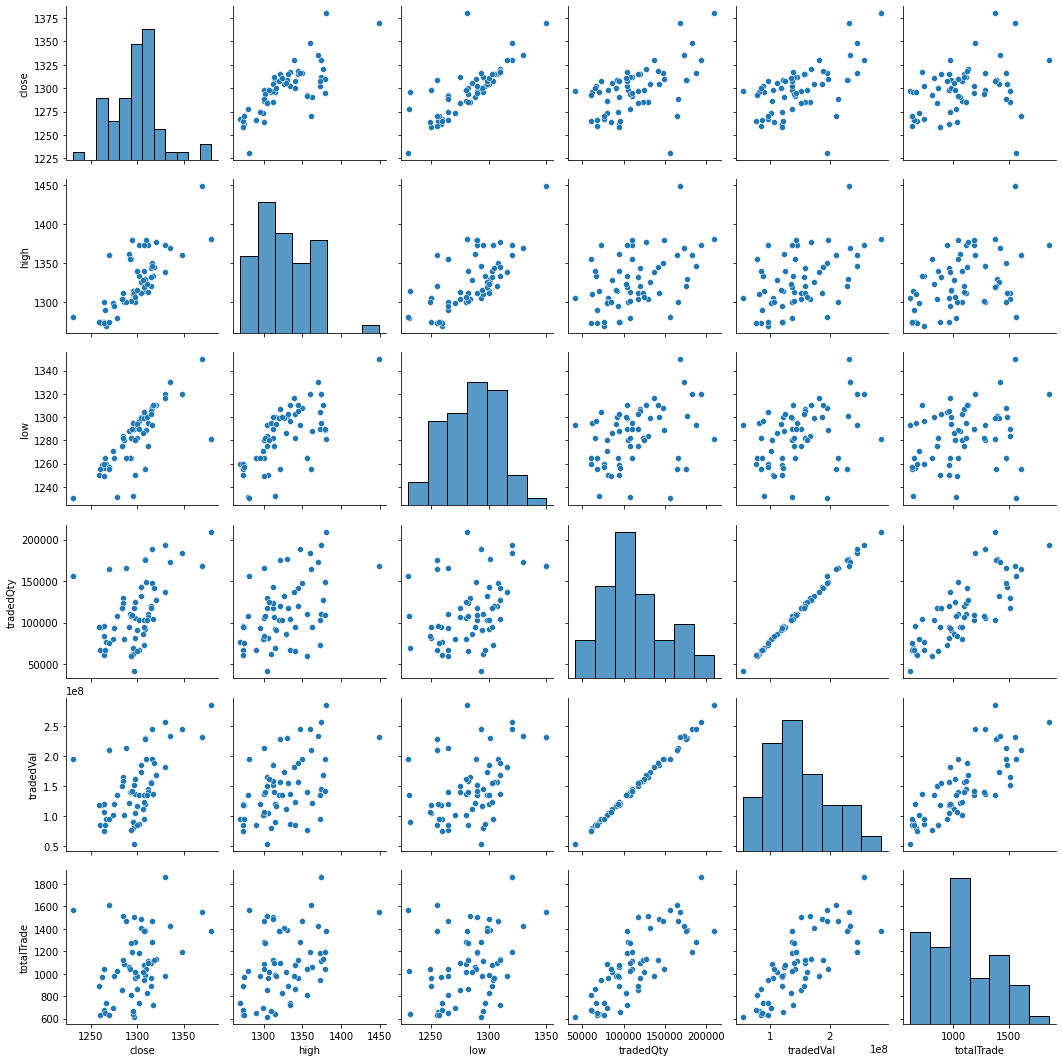

In [69]:
sns.pairplot(nabil.fillna(0))

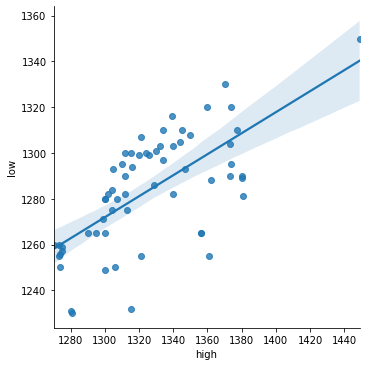

In [70]:
#TEST: ??

sns.lmplot(x='high',y='low',data=nabil)

<AxesSubplot:xlabel='high', ylabel='low'>

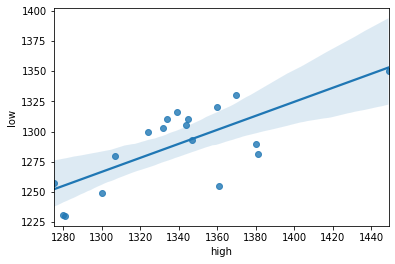

In [71]:
# TEST: ??
sns.regplot(x=apr15.high,y=apr15.low)

In [72]:
nabil

,date,close,high,low,tradedQty,tradedVal,totalTrade
0,2021-07-01,1297,1305,1293,41519,53900000,616
1,2021-06-30,1296,1315,1232,69882,90200000,638
2,2021-06-29,1296,1310,1295,62112,80700000,672
3,2021-06-28,1302,1334,1297,66695,87100000,738
4,2021-06-27,1298,1306,1250,81126,105000000,966
...,...,...,...,...,...,...,...
57,2021-04-08,1330,1339,1316,136914,182000000,977
58,2021-04-07,1317,1334,1310,104059,138000000,720
59,2021-04-06,1311,1324,1300,103143,135000000,830
60,2021-04-05,1315,1332,1303,117881,156000000,893


## Calculate Linear Regression using Scipy.stats 
#### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [73]:
# Linear Regression – This algorithm assumes that there is a linear relationship 
# (If this relationship is present, we can estimate the coefficients required by the model to make predictions on new data) between the 2 variables, 
#Input (X) and Output (Y), of the data it has learnt from. 
#The Input variable is called the Independent Variable and the Output variable is called the Dependent Variable.


In [77]:
#input parameters or training data

x = nabil["close"]
y = nabil ["tradedQty"]

print(x.min(),x.max())
print(y.min(),y.max())

1231 1380
41519 209373


In [78]:
# Calculate results

slope, intercept, r, p, std_err = spy.stats.linregress(x, y)

#Slope of the regression line
#Intercept of the regression line.
#r: rvalue Correlation coefficient
#p: p-value The p-value for a hypothesis test 
#Standard error of the estimated slope

[slope,intercept,r,p,std_err]

[786.0428083126931,
 -907487.2232213132,
 0.5231778846401691,
 1.2842362682561302e-05,
 165.300704166176]

In [79]:
result = spy.stats.linregress(x, y)
print(result.intercept, result.intercept_stderr)

-907487.2232213132 214713.51719520736


In [80]:
print(f"R-squared: {result.rvalue**2:.6f}")

R-squared: 0.273715


In [81]:
#Predicting formula

def myfunc(x):
 return slope * x + intercept

In [82]:
mymodel = list(map(myfunc, x))
mymodel[0:10]

[112010.29916024965,
 111224.25635193696,
 111224.25635193696,
 115940.51320181321,
 112796.34196856234,
 103363.82826881006,
 107294.04231037351,
 112796.34196856234,
 102577.78546049737,
 112010.29916024965]

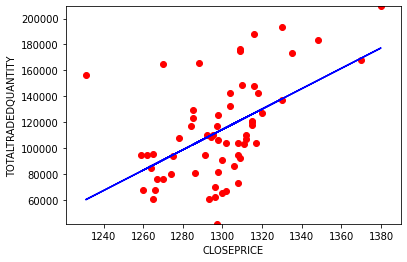

In [83]:
plt.scatter(x, y, color='r')
plt.plot(x, slope * x + intercept,color='b')

plt.ylim(ymin=y.min()-10, ymax=y.max()+10)
plt.xlim(xmin=x.min()-10, xmax=x.max()+10)

plt.xlabel("CLOSEPRICE")
plt.ylabel ("TOTALTRADEDQUANTITY")

plt.show()

## Compare above and below plot. 
#### https://seaborn.pydata.org/generated/seaborn.lmplot.html
#### https://seaborn.pydata.org/generated/seaborn.regplot.html

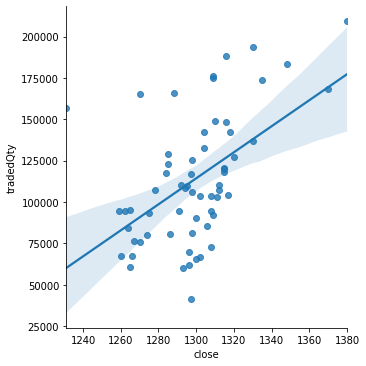

In [85]:
sns.lmplot(x='close',y='tradedQty',data=nabil)

<AxesSubplot:xlabel='close', ylabel='tradedQty'>

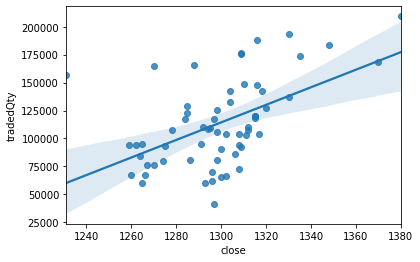

In [87]:
#TEST: explore the difference between lmplot and regplot

sns.regplot(x=nabil.close,y=nabil.tradedQty)

In [88]:
print("MIN/MAX X: ",x.min(),x.max())
print("MIN/MAX Y: ",y.min(),y.max())

MIN/MAX X:  1231 1380
MIN/MAX Y:  41519 209373


In [90]:
nabil[nabil['close']==1231].tradedQty

47    156529
Name: tradedQty, dtype: int64

In [91]:
print("Predict X: ",myfunc(1231))
print("Predict X: ",myfunc(1999))
print("Predict X: ",myfunc(1500))
print("Predict X: ",myfunc(1800))
print("Predict X: ",myfunc(1380))

Predict X:  60131.473811612
Predict X:  663812.3505957602
Predict X:  271576.9892477265
Predict X:  507389.8317415344
Predict X:  177251.85225020326


### <b style="color:red;"> NOTE :
#### We need to know relationship (r-value or correlation calue) between the values of x-axis and the values of y-axis. If there are no relationship the linear regression can not be used to predict anything.</b>
#### The 'r' value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related
##### 'r-squared' = r-value * r-value and is expressed as %

In [93]:
x = nabil["close"]
y = nabil ["tradedQty"]
slope, intercept, r, p, std_err = spy.stats.linregress(x, y)
print(r)

0.5231778846401691


##### If your data will not fit a linear regression (a straight line through all data points), it might be ideal for Polynomial Regression

In [99]:
from sklearn.metrics import r2_score

polyModel = np.poly1d(np.polyfit(x, y, 3)) #x: close, y: tradedQty
print(r2_score(y, polyModel(x)))

0.4272211567451376


In [100]:
predictQty = polyModel(1330)  #predict Traded Qty for provided 'close' price!
print(predictQty)

151005.21817159653


## TEST: looking after the low 'r' values and 'r2' score..it doesn't look like both linear and polynomial regression are the best fit to predict!

### Multiple Regression: predict a value based on two or more variables ???